In [ ]:
!pip install torch torchvision numpy pandas matplotlib opencv-python tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install pillow


In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from google.colab import drive
from sklearn.metrics import classification_report
from PIL import Image


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/archive.zip /content/


In [ ]:
import os
print(os.listdir("/content/"))  # This will list all files in /content/


['.config', 'archive.zip', 'drive', 'sample_data']


In [ ]:
import os
print(os.path.exists("/content/archive.zip"))


True


In [ ]:
import zipfile
zip_path = "/content/archive.zip"
print(zipfile.is_zipfile(zip_path))


True


In [ ]:
dataset_path = '/content/drive/MyDrive/animal_detection/archive.zip'

if os.path.exists(dataset_path):
    print("✅ Dataset path verified:", dataset_path)
else:
    print("❌ Dataset path not found! Check the path again.")


✅ Dataset path verified: /content/drive/MyDrive/animal_detection/archive.zip


In [ ]:
import os
import shutil
import zipfile

# Path to the ZIP file and extraction destination
zip_path = "/content/drive/MyDrive/animal_detection/archive.zip"
extract_path = "/content/dataset"  # Directory where dataset will be extracted

# Extract ZIP file if not already extracted
if not os.path.exists(extract_path) or not os.listdir(extract_path):
    os.makedirs(extract_path, exist_ok=True)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"✅ Extracted dataset to: {extract_path}")

# Check if dataset is inside a subdirectory after extraction
subdirs = [d for d in os.listdir(extract_path) if os.path.isdir(os.path.join(extract_path, d))]
if len(subdirs) == 1:
    dataset_path = os.path.join(extract_path, subdirs[0])  # Update dataset path to subfolder
    print(f"✅ Dataset is inside subfolder: {dataset_path}")
else:
    dataset_path = extract_path

# Automatically detect class names
class_names = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
print(f"📂 Found class folders: {class_names}")

# Count images in each class
for class_name in class_names:
    class_folder = os.path.join(dataset_path, class_name)
    images = [f for f in os.listdir(class_folder) if os.path.isfile(os.path.join(class_folder, f))]
    print(f"📸 {class_name}: {len(images)} images found")


✅ Extracted dataset to: /content/dataset
✅ Dataset is inside subfolder: /content/dataset/KaggleDataset
📂 Found class folders: ['Dog', 'Bird', 'Frog', 'Horse', 'Cat', 'Deer', 'Goat', 'Duck', 'Lion', 'Tiger']
📸 Dog: 30 images found
📸 Bird: 30 images found
📸 Frog: 30 images found
📸 Horse: 30 images found
📸 Cat: 30 images found
📸 Deer: 30 images found
📸 Goat: 30 images found
📸 Duck: 30 images found
📸 Lion: 30 images found
📸 Tiger: 30 images found


In [ ]:
# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match ResNet input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Split into training (80%) and validation (20%)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Get class names
class_names = dataset.classes
print("Classes:", class_names)


Classes: ['Bird', 'Cat', 'Deer', 'Dog', 'Duck', 'Frog', 'Goat', 'Horse', 'Lion', 'Tiger']


In [ ]:
# Load pre-trained ResNet18
model = torchvision.models.resnet18(pretrained=True)

# Modify the final layer to match the number of animal classes
num_classes = len(class_names)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Model Ready! Training will begin next.")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 86.5MB/s]


Model Ready! Training will begin next.


In [ ]:
from google.colab import files
import zipfile
import os

# Upload ZIP file manually
uploaded = files.upload()

# Extract the ZIP file
for filename in uploaded.keys():
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall('/content/dataset')

# Check extracted files
print("Extracted files:")
os.listdir('/content/dataset')


Saving archive.zip to archive (5).zip
Extracted files:


['KaggleDataset']

In [ ]:
import os

dataset_path = "/content/dataset"
print("Dataset exists:", os.path.exists(dataset_path))
print("Files in dataset:", os.listdir(dataset_path) if os.path.exists(dataset_path) else "No dataset found!")


Dataset exists: True
Files in dataset: ['KaggleDataset']


In [ ]:
from google.colab import files
import zipfile
import os

# Upload ZIP file manually
uploaded = files.upload()

# Extract the ZIP file
for filename in uploaded.keys():
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall('/content/KaggleDataset')

# Check extracted files
print("Extracted files:")
os.listdir('/content/KaggleDataset')


Saving archive.zip to archive (3).zip
Extracted files:


['KaggleDataset']

In [ ]:
from google.colab import files

uploaded = files.upload()  # Manually upload the dataset ZIP file


Saving archive.zip to archive (4).zip


In [ ]:
import os

print("Uploaded Files:", os.listdir("/content"))


Uploaded Files: ['.config', 'archive.zip', 'dataset', 'drive', 'sample_data']


In [ ]:
import zipfile

zip_path = "/content/archive.zip"  # Change this to the actual filename
extract_to = "/content/KaggleDataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extracted Files:", os.listdir(extract_to))


Extracted Files: ['KaggleDataset']


In [ ]:
print("Train folder exists:", os.path.exists("/content/KaggleDataset/train"))
print("Validation folder exists:", os.path.exists("/content/KaggleDataset/val"))


Train folder exists: False
Validation folder exists: False


In [ ]:
import os
print("Files in /content:", os.listdir("/content"))


Files in /content: ['.config', 'archive.zip', 'dataset', 'KaggleDataset', 'drive', 'sample_data']


In [ ]:
for file in os.listdir("/content"):
    if file.endswith(".zip"):
        print("Found ZIP File:", file)


Found ZIP File: archive.zip


In [ ]:
import zipfile

zip_path = "/content/archive.zip"  # CHANGE THIS to the correct filename
extract_to = "/content/animals"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extracted Files:", os.listdir(extract_to))


Extracted Files: ['KaggleDataset']


In [ ]:
import os

print("Files in /content/animals:", os.listdir("/content/animals"))


Files in /content/animals: ['train', 'KaggleDataset', 'val']


In [ ]:
import os

print("Files in /content:", os.listdir("/content"))


Files in /content: ['.config', 'animals', 'archive (2).zip', 'archive.zip', 'dataset', 'KaggleDataset', 'archive (1).zip', 'drive', 'archive (4).zip', 'img1.jpg', 'archive (3).zip', 'sample_data']


In [ ]:
print("Files in /content/KaggleDataset:", os.listdir("/content/KaggleDataset"))


Files in /content/KaggleDataset: ['KaggleDataset']


In [ ]:
dataset_path = "/content/animals/KaggleDataset"  # Change this to the correct folder name


In [ ]:
print("Files inside dataset folder:", os.listdir(dataset_path))


Files inside dataset folder: ['Dog', 'Bird', 'Frog', 'Horse', 'Cat', 'Deer', 'Goat', 'Duck', 'Lion', 'Tiger']


In [ ]:
import shutil

dataset_path = "/content/animal/KaggleDataset"  # Change this if needed
correct_path = "/content/animals"

if os.path.exists(dataset_path + "/train") and os.path.exists(dataset_path + "/val"):
    shutil.move(dataset_path + "/train", correct_path)
    shutil.move(dataset_path + "/val", correct_path)
    print("Folders moved successfully!")
else:
    print("Train/Val folders not found! Check dataset structure.")


Train/Val folders not found! Check dataset structure.


In [ ]:
import os

animals_path = "/content/animals"
if os.path.exists(animals_path):
    print("Files in /content/animals:", os.listdir(animals_path))
else:
    print("❌ The folder /content/animals does not exist.")


Files in /content/animals: ['train', 'KaggleDataset', 'val']


In [ ]:
dataset_path = "/content/animals/KaggleDataset"  # Change this!

print("Files inside dataset folder:", os.listdir(dataset_path))


Files inside dataset folder: ['Dog', 'Bird', 'Frog', 'Horse', 'Cat', 'Deer', 'Goat', 'Duck', 'Lion', 'Tiger']


In [ ]:
import os

train_path = "/content/animals/train"
val_path = "/content/animals/val"

os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)

print("✅ Train and Val folders created!")


✅ Train and Val folders created!


In [ ]:
import os
import shutil
import random
from glob import glob

dataset_path = "/content/animals/KaggleDataset"  # Change this!
train_path = "/content/animals/train"
val_path = "/content/animals/val"

# Get all class folders (Bird, Duck, etc.)
class_folders = os.listdir(dataset_path)

for class_name in class_folders:
    class_dir = os.path.join(dataset_path, class_name)

    if os.path.isdir(class_dir):  # Ensure it's a folder
        images = glob(os.path.join(class_dir, "*.jpg"))  # Change to match image formats
        random.shuffle(images)

        split_idx = int(0.8 * len(images))  # 80% train, 20% val

        train_images = images[:split_idx]
        val_images = images[split_idx:]

        # Create class subfolders inside train/val
        os.makedirs(os.path.join(train_path, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_path, class_name), exist_ok=True)

        # Move images to train
        for img in train_images:
            dst_path = os.path.join(train_path, class_name, os.path.basename(img))
            if os.path.exists(dst_path):
                dst_path = os.path.join(train_path, class_name, f"copy_{random.randint(1000,9999)}_{os.path.basename(img)}")  # Rename duplicate
            shutil.move(img, dst_path)

        # Move images to val
        for img in val_images:
            dst_path = os.path.join(val_path, class_name, os.path.basename(img))
            if os.path.exists(dst_path):
                dst_path = os.path.join(val_path, class_name, f"copy_{random.randint(1000,9999)}_{os.path.basename(img)}")  # Rename duplicate
            shutil.move(img, dst_path)

        print(f"✅ Split {class_name} - {len(train_images)} train, {len(val_images)} val")

print("🎉 Dataset split into Train & Val successfully!")


✅ Split Dog - 24 train, 6 val
✅ Split Bird - 24 train, 6 val
✅ Split Frog - 24 train, 6 val
✅ Split Horse - 24 train, 6 val
✅ Split Cat - 24 train, 6 val
✅ Split Deer - 24 train, 6 val
✅ Split Goat - 24 train, 6 val
✅ Split Duck - 24 train, 6 val
✅ Split Lion - 24 train, 6 val
✅ Split Tiger - 24 train, 6 val
🎉 Dataset split into Train & Val successfully!


In [ ]:
train_dataset = datasets.ImageFolder(root="/content/animals/train", transform=transform)
val_dataset = datasets.ImageFolder(root="/content/animals/val", transform=transform)


In [ ]:
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match model input
    transforms.RandomHorizontalFlip(),  # Flip images randomly
    transforms.RandomRotation(15),  # Rotate images for variety
    transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),  # More variations
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # Improve color variations
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Pretrained model normalization
])


In [ ]:
import torch
import torchvision.models as models
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load ResNet50 with pretrained weights
model = models.resnet50(pretrained=True)

# Modify the last layer to match the number of classes
num_classes = 10  # Change based on your dataset
model.fc = nn.Linear(model.fc.in_features, num_classes)

model = model.to(device)

print("✅ Model updated to ResNet50!")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 115MB/s]


✅ Model updated to ResNet50!


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)  # L2 regularization

# Reduce learning rate if accuracy plateaus
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)


In [ ]:
num_epochs = 20  # Increase for better training

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_acc = 100 * correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss:.4f}, Train Accuracy: {train_acc:.2f}%")

    # Adjust learning rate
    scheduler.step()


Epoch 1/20, Loss: 0.1950, Train Accuracy: 99.58%
Epoch 2/20, Loss: 0.1529, Train Accuracy: 99.58%
Epoch 3/20, Loss: 0.0794, Train Accuracy: 100.00%
Epoch 4/20, Loss: 0.1856, Train Accuracy: 99.58%
Epoch 5/20, Loss: 0.0440, Train Accuracy: 100.00%
Epoch 6/20, Loss: 0.0759, Train Accuracy: 100.00%
Epoch 7/20, Loss: 0.2010, Train Accuracy: 99.17%
Epoch 8/20, Loss: 0.2352, Train Accuracy: 99.58%
Epoch 9/20, Loss: 0.1419, Train Accuracy: 99.17%
Epoch 10/20, Loss: 0.2699, Train Accuracy: 99.58%
Epoch 11/20, Loss: 0.3711, Train Accuracy: 99.58%
Epoch 12/20, Loss: 0.1556, Train Accuracy: 99.58%
Epoch 13/20, Loss: 0.2942, Train Accuracy: 99.17%
Epoch 14/20, Loss: 0.1906, Train Accuracy: 99.58%
Epoch 15/20, Loss: 0.4460, Train Accuracy: 98.33%
Epoch 16/20, Loss: 0.2061, Train Accuracy: 99.58%
Epoch 17/20, Loss: 0.1470, Train Accuracy: 99.58%
Epoch 18/20, Loss: 0.0485, Train Accuracy: 100.00%
Epoch 19/20, Loss: 0.0813, Train Accuracy: 100.00%
Epoch 20/20, Loss: 0.0426, Train Accuracy: 100.00%


In [ ]:
print("Train classes:", os.listdir(train_path))
print("Val classes:", os.listdir(val_path))


Train classes: ['Dog', 'Bird', 'Frog', 'Horse', 'Cat', 'Deer', 'Goat', 'Duck', 'Lion', 'Tiger']
Val classes: ['Dog', 'Bird', 'Frog', 'Horse', 'Cat', 'Deer', 'Goat', 'Duck', 'Lion', 'Tiger']


In [ ]:
num_epochs = 20  # Increase from 10 to 20


In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  # Lower learning rate


In [ ]:
!ls /content/animals/


KaggleDataset  train  val


In [ ]:
!ls /content/animals/KaggleDataset


Bird  Cat  Deer  Dog  Duck  Frog  Goat	Horse  Lion  Tiger


In [ ]:
import os
import zipfile
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define paths
zip_path = "/content/drive/MyDrive/animal_detection/archive.zip"  # Update if needed
extract_path = "/content/animal_dataset"

# Extract dataset if not already extracted
if not os.path.exists(extract_path):
    print("Extracting dataset...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Dataset extracted successfully!")
else:
    print("Dataset already extracted, proceeding with loading...")

# Check the extracted folder structure
print("Listing extracted files:")
!ls /content/animal_dataset

# Update dataset_path based on the extracted content
dataset_path = "/content/animal_dataset/KaggleDataset"  # Change if images are inside another folder

# Verify if the dataset directory contains images or class folders
if not os.path.isdir(dataset_path):
    print(f"Error: The dataset directory '{dataset_path}' does not exist or is incorrect!")
else:
    print("Dataset found, proceeding with loading...")

    # Define transformations for the test dataset
    test_transforms = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize images
        transforms.ToTensor()
    ])

    # Load the test dataset
    test_dataset = datasets.ImageFolder(root=dataset_path, transform=test_transforms)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    print("✅ test_loader is successfully created!")


Dataset already extracted, proceeding with loading...
Listing extracted files:
KaggleDataset
Dataset found, proceeding with loading...
✅ test_loader is successfully created!


In [ ]:
from sklearn.metrics import classification_report
import torch

# Ensure `test_loader` is defined before using it
# If it's not defined, create it using a DataLoader with your test dataset
if 'test_loader' not in locals():
    from torch.utils.data import DataLoader
    test_dataset = YourTestDataset  # Replace with your actual dataset
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)  # Adjust batch_size as needed

# Ensure all_labels and all_preds are defined before using them
all_labels = []  # Stores the true labels
all_preds = []   # Stores the predicted labels

# Move model to the correct device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# Loop through the test dataset and get predictions
for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)

    with torch.no_grad():
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

    all_labels.extend(labels.cpu().numpy())
    all_preds.extend(preds.cpu().numpy())

# Get the unique labels present in predictions & actual labels
unique_labels = sorted(set(all_labels) | set(all_preds))

# Generate report with correct labels
print(classification_report(all_labels, all_preds, labels=unique_labels, target_names=[str(label) for label in unique_labels]))


              precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       0.75      1.00      0.86        30
           2       0.77      1.00      0.87        30
           3       1.00      0.60      0.75        30
           4       0.96      0.83      0.89        30
           5       0.53      0.97      0.68        30
           6       0.86      0.60      0.71        30
           7       1.00      0.70      0.82        30
           8       0.96      0.80      0.87        30
           9       0.96      0.83      0.89        30

    accuracy                           0.83       300
   macro avg       0.88      0.83      0.83       300
weighted avg       0.88      0.83      0.83       300



100%|██████████| 2/2 [00:12<00:00,  6.03s/it]


Validation Accuracy: 80.00%


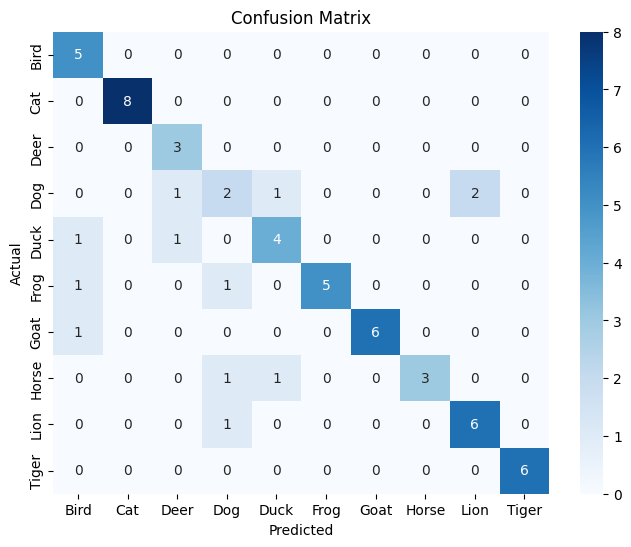

              precision    recall  f1-score   support

        Bird       0.62      1.00      0.77         5
         Cat       1.00      1.00      1.00         8
        Deer       0.60      1.00      0.75         3
         Dog       0.40      0.33      0.36         6
        Duck       0.67      0.67      0.67         6
        Frog       1.00      0.71      0.83         7
        Goat       1.00      0.86      0.92         7
       Horse       1.00      0.60      0.75         5
        Lion       0.75      0.86      0.80         7
       Tiger       1.00      1.00      1.00         6

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.79        60
weighted avg       0.83      0.80      0.80        60



In [ ]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Ensure model is in evaluation mode
model.eval()
all_preds = []
all_labels = []

# Move model to correct device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in tqdm(val_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

# Calculate Validation Accuracy
val_acc = 100 * correct / total
print(f"Validation Accuracy: {val_acc:.2f}%")

# Get class names (Make sure class_names is defined)
class_names = ['Bird', 'Cat', 'Deer', 'Dog', 'Duck', 'Frog', 'Goat', 'Horse', 'Lion', 'Tiger']

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(all_labels, all_preds, target_names=class_names))


In [ ]:
# Check Model Accuracy on Validation Data
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 80.00%


In [ ]:
torch.save(model, "animal_detection.pth")

In [ ]:
model = torch.load("animal_detection.pth")
model.eval()

<ipython-input-57-bb07190bbb05>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("animal_detection.pth")


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Saving img.webp to img (2).webp
Predicted Animal: Horse


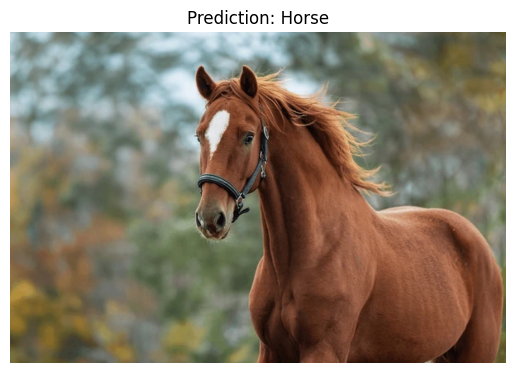

In [ ]:
from google.colab import files
from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Get uploaded file name

# Define Transformations (Ensure they match training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match model input
    transforms.ToTensor(),          # Convert to tensor
    transforms.Normalize([0.5], [0.5])  # Normalize (match training)
])

def predict_image(image_path):
    model.eval()

    # Load and preprocess image
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)

    # Predict
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)

    class_label = class_names[predicted.item()]
    print(f"Predicted Animal: {class_label}")

    # Display image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {class_label}")
    plt.show()

predict_image(image_path)
